In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py

In [ ]:
from google.colab import files
files.upload()

Saving ConcreteData.xlsx to ConcreteData.xlsx


{'ConcreteData.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xaa\xf7X\xa4y\x01\x00\x00\x14\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [ ]:
df=pd.read_excel('ConcreteData.xlsx')

In [ ]:
df.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                                int64
Concrete compressive strength    float64
dtype: object

In [ ]:
df.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [ ]:
y=df['Concrete compressive strength']
x=df.iloc[:,0:7]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42)

In [ ]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (875, 7)
Shape of x_test:  (155, 7)
Shape of y_train:  (155,)
Shape of y_test:  (155,)


In [ ]:
from sklearn.linear_model import LinearRegression
model_regresi = LinearRegression()
model_regresi.fit(x_train,y_train)

LinearRegression()

In [ ]:
print(pd.DataFrame({'Predictor' : x.columns, 'coefficient' : model_regresi.coef_}))

             Predictor  coefficient
0              Cement      0.105004
1  Blast Furnace Slag      0.077775
2             Fly Ash      0.046577
3              Water      -0.111869
4    Superplasticizer      0.353658
5    Coarse Aggregate      0.004193
6       Fine Aggregate    -0.001849


In [ ]:
y_pred_train=model_regresi.predict(x_train)
hasil_train = pd.DataFrame({'Predicted_CS' : y_pred_train, 'Actual_CS' : y_train, 'Residual' : y_train - y_pred_train})
print(hasil_train.head(20))

     Predicted_CS  Actual_CS   Residual
467     26.975175  41.161717  14.186542
884     32.695599  23.835185  -8.860414
755     54.382019  71.622767  17.240747
106     54.442138  55.895819   1.453681
858     43.547361  52.420860   8.873499
55      25.697787  14.638265 -11.059522
120     55.971540  56.695611   0.724071
310     35.317931  35.232224  -0.085707
25      30.513862  53.300632  22.786770
72      56.939516  33.398217 -23.541299
530     48.290269  66.780675  18.490406
44      39.336397  41.542997   2.206601
275     29.215851  29.930153   0.714302
478     54.548730  52.007175  -2.541555
314     35.119006  21.022123 -14.096882
336     36.625536  51.331488  14.705953
689     29.288688  16.889404 -12.399284
430     24.699303  24.283345  -0.415958
950     37.607401  38.630651   1.023250
833     39.973162  36.349175  -3.623987


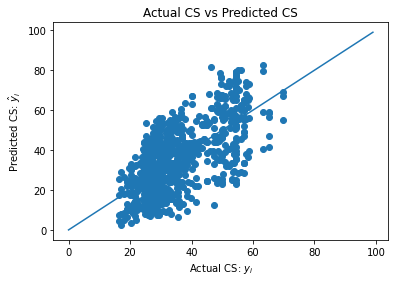

In [ ]:
plt.scatter(y_pred_train, y_train)
plt.plot(range(100), range(100))

plt.xlabel("Actual CS: $y_i$")
plt.ylabel("Predicted CS: $\hat{y}_i$")
plt.title("Actual CS vs Predicted CS")

plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_pred_train = model_regresi.predict(x_train)
r2_score_train = r2_score(y_train, y_pred_train)

y_pred_test = model_regresi.predict(x_test)
r2_score_test = r2_score(y_test, y_pred_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
cross_val = cross_val_score(estimator = model_regresi, X = x, y = y, cv =folds)

In [ ]:
print('R2_score (train): ', r2_score_train)
print('R2_score (test): ', r2_score_test)
print("RMSE (train): ", rmse_train)
print("RMSE (test): ", rmse_test)
print("CV: ", cross_val.mean())

R2_score (train):  0.4499388513256416
R2_score (test):  0.43292809895651885
RMSE (train):  12.446109466386515
RMSE (test):  12.185367656056947
CV:  0.42878058977174105


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


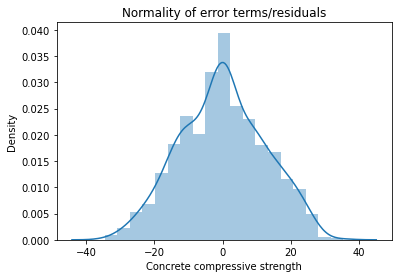

In [ ]:
p = sns.distplot(y_train - y_pred_train, kde = True)
p = plt.title('Normality of error terms/residuals')

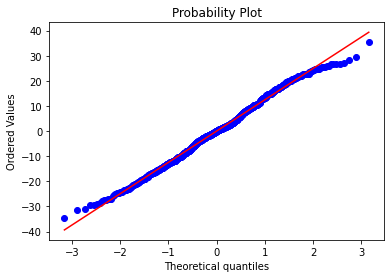

In [ ]:
stats.probplot(y_train - y_pred_train, dist = "norm", plot=py)
py.show()

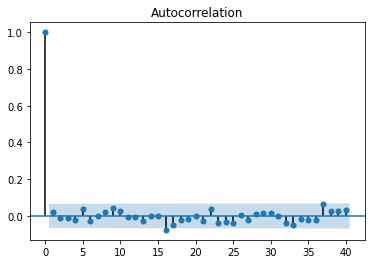

In [ ]:
sm.graphics.tsa.plot_acf(y_train - y_pred_train , lags=40)
plt.show()

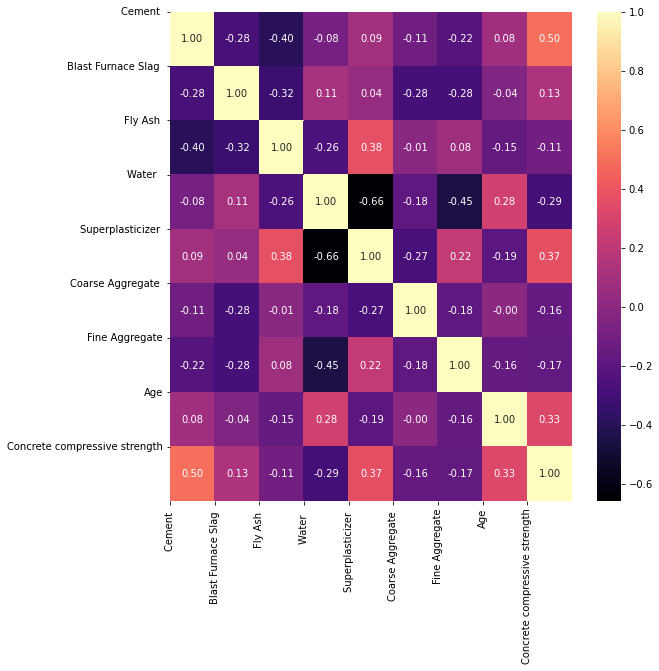

In [ ]:
korelasi=df.corr()
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(korelasi, cmap='magma' , annot=True, fmt=".2f")
plt.xticks(range(len(korelasi.columns)), korelasi.columns)
plt.yticks(range(len(korelasi.columns)), korelasi.columns)
plt.show()

In [ ]:
x_const_train=sm.add_constant(x_train)
modelsm= sm.OLS(y_train, x_const_train).fit()
modelsm.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Concrete compressive strength   R-squared:                       0.450
Model:                                       OLS   Adj. R-squared:                  0.445
Method:                            Least Squares   F-statistic:                     101.3
Date:                           Tue, 27 Dec 2022   Prob (F-statistic):          4.78e-108
Time:                                   04:57:34   Log-Likelihood:                -3447.8
No. Observations:                            875   AIC:                             6912.
Df Residuals:                                867   BIC:                             6950.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  13.4493     33.831      0.398      0.691     -52.950      79.849
Cement                  0.1050      0.011      9.677      0.000       0.084       0.126
Blast Furnace Slag      0.0778      0.013      5.972      0.000       0.052       0.103
Fly Ash                 0.0466      0.016      2.874      0.004       0.015       0.078
Water                  -0.1119      0.051     -2.204      0.028      -0.211      -0.012
Superplasticizer        0.3537      0.120      2.937      0.003       0.117       0.590
Coarse Aggregate        0.0042      0.012      0.350      0.726      -0.019       0.028
Fine Aggregate         -0.0018      0.014     -0.136      0.892      -0.029       0.025
==============================================================================
Omnibus:                       11.149   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.063
Skew:                           0.003   Prob(JB):                       0.0293
Kurtosis:                       2.560   Cond. No.                     1.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""